In [61]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns

Generate random number and Obtain X & Visualised Y and X distribution

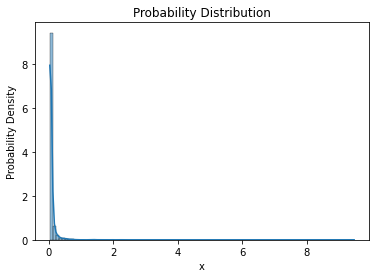

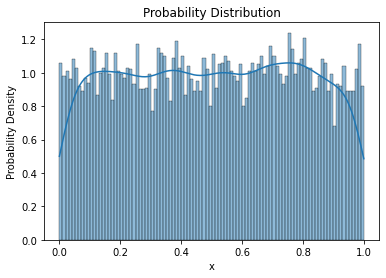

In [66]:
# Define the value of 'a'
a = 1.5  # example value, set 'a' as needed

# Initialize a list to store the values of X
X_values = []
Y_val = []

# Iterate 100 times
for _ in range(10000):
    Y = random.random()
    X = math.exp(-3.5065) * ((1 - Y) ** (-1 / a))
    X_values.append(X)
    Y_val.append(Y)

# Plot the distribution of X
sns.histplot(X_values, kde=True, stat="density", bins=100)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Probability Distribution')
plt.show()



sns.histplot(Y_val, kde=True, stat="density", bins=100)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Probability Distribution')
plt.show()



Testing the distribution of pi values, must be algebraic

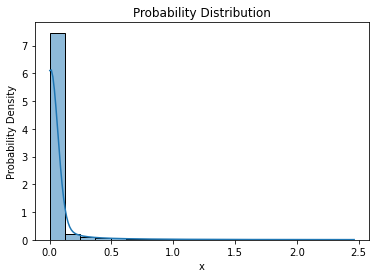

In [67]:
A_values=[]
a=1.5
b=0.03
for x in np.linspace(0.1, 3, 1000):
    A=(a*(b**a))/(x**(1+a))
    A_values.append(A)

# Plot the distribution of X
sns.histplot(A_values, kde=True, stat="density", bins=20)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Probability Distribution')
plt.show()




Now we will choose a random number from list of X keeping in mind that it has to be less tha zero. This gives us the pi value needed


In [124]:
while True:
    print("I give you this 'pi': ");
    pi = random.choice(X_values);
    if number < 1:
        print(pi);
        break 
    else:
        print("not yet")


I give you this 'pi': 
0.4907635688303779


Now we can move towards the resetting part:
Lets just obtain for one pi then we can simulate for diffrent realizations.
Code a one D hopping problem taking pi as the hopping probability.


..............................................................................................................................



STEP 1: Generate list of Resetting time drawn from exponential distribution: List is given by T_values

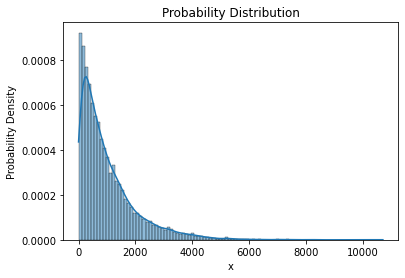

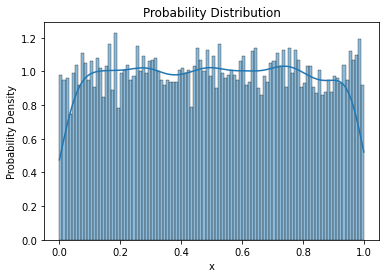

In [138]:
# Define the value of 'r' = 1.5  # example value, set 'a' as needed
ro=0.001
To=0.001
# Initialize a list to store the values of X
T_values = []
R_val = []

# Iterate 100 times
for _ in range(10000):
    R = random.random()
    T = (np.log(math.exp(ro*To)/(1-(R*math.exp(ro*To)))))/ro
    T_values.append(T)
    R_val.append(R)

# Plot the distribution of X
sns.histplot(T_values, kde=True, stat="density", bins=100)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Probability Distribution')
plt.show()



sns.histplot(R_val, kde=True, stat="density", bins=100)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Probability Distribution')
plt.show()

Time to code for the one D hopping case:

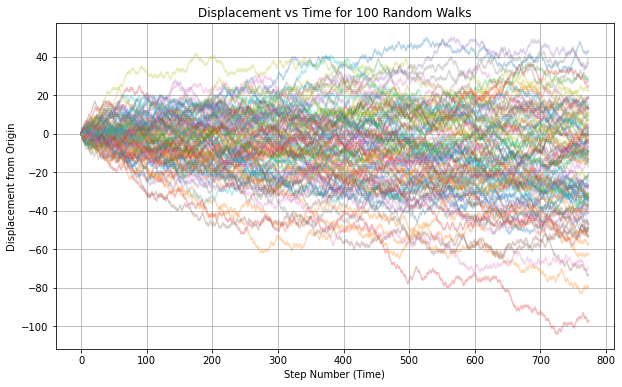

In [166]:
# Parameters
num_trials = 100


initial_position = 0   # Starting position
num_steps = int(random.choice(T_values))       # Total time steps to simulate
jump_prob_right = pi  # Probability of jumping to the right
jump_prob_left = 1-jump_prob_right # Probability of jumping to the left (1 - jump_prob_right)
jump_distance = 1      # Distance of each jump
    
displacements_over_time = np.zeros((num_trials, num_steps + 1))

for trial in range(num_trials):

    steps = np.random.choice([jump_distance, -jump_distance], size=num_steps, p=[jump_prob_right, 1 - jump_prob_right])
    
    # Simulate the random walk
    positions = np.cumsum(np.concatenate([[initial_position], steps]))
    displacements_over_time[trial, :] = positions

#     # Calculate displacement (final position relative to the origin)
#     final_position = positions[-1]  # Last position in the array
#     displacement = abs(final_position - initial_position)
#     final_displacements.append(displacement)
#     positions = np.append(positions, initial_position)
    
    # Store the final displacement
    
    # Bring particle back to the origin in one step
    # Add the required step to make the final position 0
    # Append the origin (position 0
    
plt.figure(figsize=(10, 6))
for trial in range(num_trials):
    plt.plot(range(num_steps + 1), displacements_over_time[trial, :], alpha=0.3)  # Alpha is for transparency

plt.xlabel('Step Number (Time)')
plt.ylabel('Displacement from Origin')
plt.title('Displacement vs Time for 100 Random Walks')
plt.grid(True)
plt.show()



# # Plot the random walk and return to the origin
# plt.plot(range(len(positions)), positions, marker='o', label="Random Walk")
# plt.axhline(0, color='red', linestyle='--', label="Origin")
# plt.xlabel('Step Number')
# plt.ylabel('Position')
# plt.title('1D Random Walk with Return to Origin')
# plt.legend()
# plt.grid(True)
# plt.show()


In [155]:
num_steps

2088

In [164]:
displacement

20

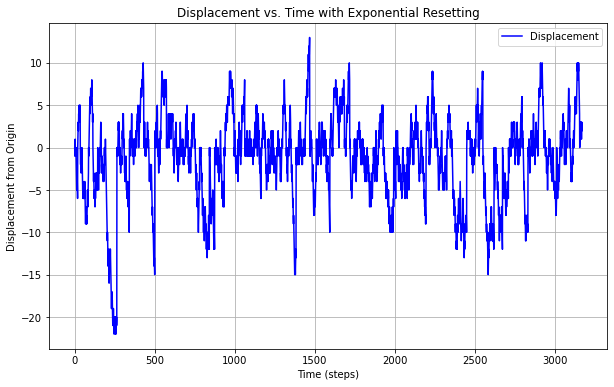

In [168]:
# Parameters
num_steps = int(random.choice(T_values))  # Total number of steps in the simulation
r = 0.001  # Resetting rate
initial_position = 0  # Initial position of the particle (origin)
jump_distance = 1  # Distance for each hop
jump_prob_right = pi  # Probability of jumping right
reset_times = np.random.exponential(1/r, size=num_steps)  # Generate random reset times based on exponential distribution

# Initialize the position and displacement arrays
positions = np.zeros(num_steps)
displacement = np.zeros(num_steps)

# Initial values
current_position = initial_position
time_since_reset = 0

# Run the random walk with exponential resetting
for step in range(1, num_steps):
    # Perform random hopping
    if np.random.rand() < jump_prob_right:
        current_position += jump_distance  # Jump right
    else:
        current_position -= jump_distance  # Jump left
    
    # Update time since last reset
    time_since_reset += 1
    
    # Check if we need to reset
    if time_since_reset >= reset_times[step]:
        current_position = initial_position  # Reset to the origin
        time_since_reset = 0  # Reset the clock

    # Record the current position and displacement
    positions[step] = current_position
    displacement[step] = current_position - initial_position

# Plotting the displacement vs. time curve
plt.figure(figsize=(10, 6))
plt.plot(range(num_steps), displacement, label="Displacement", color='blue')
plt.xlabel('Time (steps)')
plt.ylabel('Displacement from Origin')
plt.title('Displacement vs. Time with Exponential Resetting')
plt.grid(True)
plt.legend()
plt.show()
